In [ ]:
!pip install rake_nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=56c40e72c7a12c3a427387b4e885c907d78b627bdeb41beafa2b5a310ca0bcda
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from rake_nltk import Rake

In [ ]:
courses = pd.read_csv('/content/gdrive/MyDrive/Coursera_courses.csv')
reviews = pd.read_csv('/content/gdrive/MyDrive/Coursera_reviews.csv')

In [ ]:
data = courses.merge(reviews, how='inner', on='course_id')

In [ ]:
data.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
len(data)

519891

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519891 entries, 0 to 1454700
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          519891 non-null  object
 1   institution   519891 non-null  object
 2   course_url    519891 non-null  object
 3   course_id     519891 non-null  object
 4   reviews       519891 non-null  object
 5   reviewers     519891 non-null  object
 6   date_reviews  519891 non-null  object
 7   rating        519891 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 35.7+ MB


In [ ]:
course_ratings = data.groupby('course_id', as_index=False).agg({'rating':np.average})
course_ratings = course_ratings.sort_values(by='rating', ascending=False)
course_ratings.rename(columns={'rating':'overall'}, inplace=True)
course_ratings.reset_index(inplace=True)

In [ ]:
course_ratings.head()

,index,course_id,overall
0,50,building-modern-python-applications-on-aws,5.000
1,167,entreprise-changement-climatique,5.000
2,470,remote-team-management,5.000
3,471,removing-barriers-to-change,5.000
4,341,legaltech,4.968


In [ ]:
course_ratings.tail()

,index,course_id,overall
599,465,quantum-computing-algorithms,3.204545
600,166,entrepreneurship-strategy,1.000000
601,112,curanderismo-plants,1.000000
602,172,epigenetics,1.000000
603,495,social-economic-networks,1.000000


In [ ]:
count_df = data.groupby('course_id', as_index=False).agg({'reviewers': 'count'})

In [ ]:
count_df.rename(columns={'reviewers':'total_reviews'}, inplace=True)
count_df = count_df.sort_values(by = 'total_reviews', ascending=False)
count_df.head()

,course_id,total_reviews
446,python,15226
344,machine-learning,12677
388,neural-networks-deep-learning,12291
532,technical-support-fundamentals,12054
339,learning-how-to-learn,11871


In [ ]:
courses_data = data[['course_id', 'name']]

In [ ]:
count = pd.merge(count_df, courses_data, how='inner', on=['course_id'])
count.drop_duplicates(inplace=True)

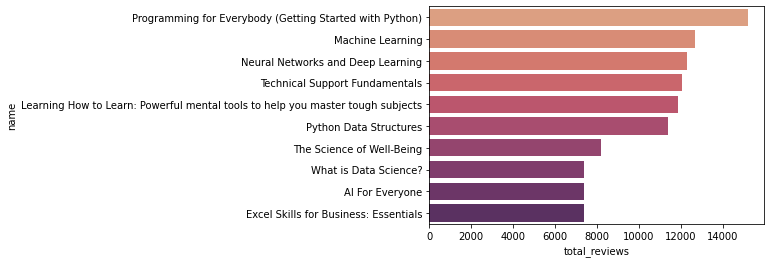

In [ ]:
sns.barplot(x=count.head(10).total_reviews, y=count.head(10).name, palette='flare')

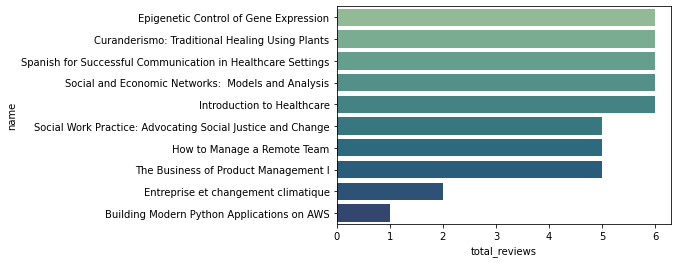

In [ ]:
sns.barplot(x=count.tail(10).total_reviews, y=count.tail(10).name, palette='crest')

In [ ]:
mean_df = pd.merge(course_ratings, courses_data, how='inner', on=['course_id'])
mean_df.drop_duplicates(inplace=True)

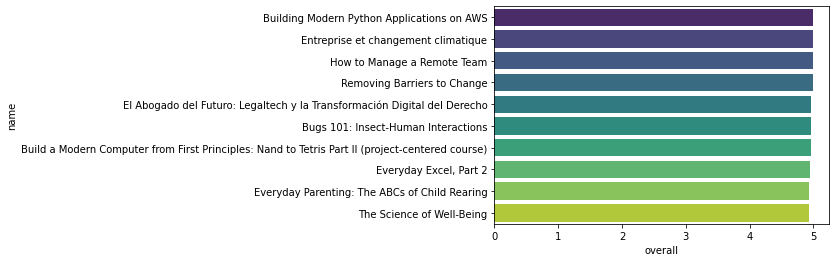

In [ ]:
sns.barplot(x=mean_df.head(10).overall, y=mean_df.head(10).name, palette='viridis')

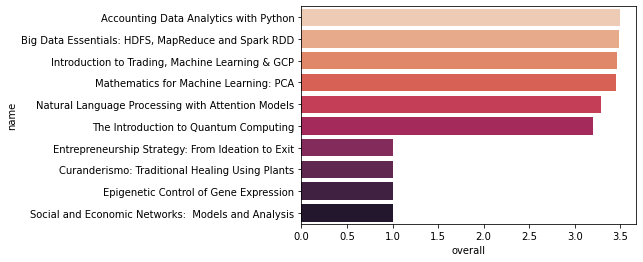

In [ ]:
sns.barplot(x=mean_df.tail(10).overall, y=mean_df.tail(10).name, palette='rocket_r')

In [ ]:
df1 = pd.merge(data, count_df, how='right', on=['course_id'])
df1.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,total_reviews
0,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,I did not find this course helpful. The assign...,By Eric V H,"Oct 05, 2017",1,15226
1,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,I got a 95% and maybe I learned something but ...,By Connor B,"Aug 06, 2017",1,15226
2,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,"Mar 28, 2019",1,15226
3,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,We tried to use this class to teach a brown ba...,By Steve M,"Oct 20, 2015",1,15226
4,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,"To be honest, I thought the course stumbled an...",By Terence P,"May 11, 2016",1,15226


In [ ]:
df2 = pd.merge(df1, course_ratings, how = 'right', on=['course_id'])
df2.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,total_reviews,index,overall
0,Building Modern Python Applications on AWS,Amazon Web Services,https://www.coursera.org/learn/building-modern...,building-modern-python-applications-on-aws,very Nice Course,By Mihir K S,"Oct 01, 2020",5,1,50,5.0
1,Entreprise et changement climatique,ESSEC Business School,https://www.coursera.org/learn/entreprise-chan...,entreprise-changement-climatique,Un cours avec un contenu très riche qui permet...,By ARYPHONE B,"Sep 30, 2020",5,2,167,5.0
2,Entreprise et changement climatique,ESSEC Business School,https://www.coursera.org/learn/entreprise-chan...,entreprise-changement-climatique,"Complet, pertinent et accessible. Seul bémol: ...",By Paul D,"Oct 06, 2020",5,2,167,5.0
3,How to Manage a Remote Team,GitLab,https://www.coursera.org/learn/remote-team-man...,remote-team-management,It is an excellent course and just in time in ...,By MMR,"Sep 23, 2020",5,5,470,5.0
4,How to Manage a Remote Team,GitLab,https://www.coursera.org/learn/remote-team-man...,remote-team-management,"This course has been easy to follow, very info...",By Hugo A,"Oct 01, 2020",5,5,470,5.0


In [ ]:
df3 = df2[['course_id', 'reviews']][df2['total_reviews'].ge(50)]
df3.head()

,course_id,reviews
16,legaltech,A pesar de que el curso brinda muchos ejemplos...
17,legaltech,Curso correcto donde se adquieren los conocimi...
18,legaltech,TE DEJA VER EL ADELANTO DE LA TECNOLOGIA Y DEL...
19,legaltech,EXCELENTE CURSO!
20,legaltech,es un curso muy interesante por su contenido y...


In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3 = df3.groupby(['course_id'])['reviews'].apply(list)

In [ ]:
course_review = pd.DataFrame(df3)

In [ ]:
course_review

,reviews
course_id,
aboriginal-education,[This course has great intentions and decent c...
accounting-analytics,"[First of all, I really enjoyed Professor Ittn..."
actualizacion-manejo-diabetes-tipo-2,[NO ME DEJA DAR MI CERIFICADO Y NO ME PUEDO CO...
addiction-and-the-brain,"[Feels underwritten by the DEA, and aimed at p..."
addiction-treatment,[Excellent course content that is delivered in...
...,...
wind-energy,[This course is a classic case of too many coo...
wine,[\nThis course is not for free! You have to pu...
womens-health-human-rights,"[The course is great, however cannot proceed w..."


In [ ]:
df4 = pd.merge(course_ratings, course_review, on='course_id', how='inner')
df4 = df4[['course_id', 'overall', 'reviews']]

In [ ]:
df4

,course_id,overall,reviews
0,legaltech,4.968000,[A pesar de que el curso brinda muchos ejemplo...
1,bugs-101,4.962963,[A good basic overview of the insects (and som...
2,nand2tetris2,4.956989,[Almost perfect. But writing the compiler and ...
3,everyday-parenting,4.929530,[I want my certificate...what shall i donow..H...
4,the-science-of-well-being,4.929504,[The course is mostly about the opinion of the...
...,...,...,...
548,analytics-excel,3.712673,[This course has more holes than swiss cheese....
549,wharton-introduction-spreadsheets-models,3.618881,[The information is glossed over quickly and d...
550,big-data-essentials,3.484127,[Tools provided in the course to submit the as...
551,introduction-trading-machine-learning-gcp,3.463768,[This course is a pre-sales demo of BigQuery. ...


In [ ]:
df4['joint_reviews'] = df4['reviews'].apply(lambda x: ' '.join(x))

In [ ]:
df4

,course_id,overall,reviews,joint_reviews
0,legaltech,4.968000,[A pesar de que el curso brinda muchos ejemplo...,A pesar de que el curso brinda muchos ejemplos...
1,bugs-101,4.962963,[A good basic overview of the insects (and som...,A good basic overview of the insects (and some...
2,nand2tetris2,4.956989,[Almost perfect. But writing the compiler and ...,Almost perfect. But writing the compiler and t...
3,everyday-parenting,4.929530,[I want my certificate...what shall i donow..H...,I want my certificate...what shall i donow..He...
4,the-science-of-well-being,4.929504,[The course is mostly about the opinion of the...,The course is mostly about the opinion of the ...
...,...,...,...,...
548,analytics-excel,3.712673,[This course has more holes than swiss cheese....,This course has more holes than swiss cheese. ...
549,wharton-introduction-spreadsheets-models,3.618881,[The information is glossed over quickly and d...,The information is glossed over quickly and do...
550,big-data-essentials,3.484127,[Tools provided in the course to submit the as...,Tools provided in the course to submit the ass...
551,introduction-trading-machine-learning-gcp,3.463768,[This course is a pre-sales demo of BigQuery. ...,This course is a pre-sales demo of BigQuery. I...


In [ ]:
reviews_series = df4['joint_reviews']
countVector1 = CountVectorizer(max_features = 500, stop_words='english') 
transformedReviews = countVector1.fit_transform(reviews_series) 
dfReviews1 = pd.DataFrame(transformedReviews.A, columns=countVector1.get_feature_names())
dfReviews1 = dfReviews1.astype(int)

In [ ]:
dfReviews1

,10,able,absolutely,actually,add,additional,advanced,ai,al,algorithms,amazing,analysis,analytics,andrew,answer,answers,application,applications,apply,appreciate,approach,aprender,aprendizaje,aspects,assignment,assignments,available,awesome,background,based,basic,basics,bastante,beginner,beginners,beginning,believe,best,better,bien,...,totally,training,truly,try,trying,una,understand,understandable,understanding,university,use,used,useful,using,valuable,value,various,ve,video,videos,view,want,wants,way,ways,web,week,weeks,wish,wonderful,work,working,works,world,worth,write,writing,ya,years,курс
0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,6,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
1,4,2,7,1,0,2,2,0,1,0,37,0,0,0,4,0,0,1,2,10,0,1,0,10,0,0,8,13,3,3,6,4,0,2,5,5,0,6,6,1,...,4,2,2,2,1,0,17,1,7,19,5,4,14,3,4,2,6,13,5,13,4,6,0,18,5,0,2,1,3,14,13,5,0,23,5,0,0,0,3,0
2,5,2,4,4,1,1,0,0,0,1,8,0,0,0,0,0,2,0,0,0,0,0,0,1,6,3,1,1,1,0,2,1,0,1,1,0,2,14,3,0,...,0,0,1,0,1,0,4,0,7,2,3,1,3,2,2,0,0,11,2,3,2,1,2,11,1,2,15,8,4,1,17,0,4,2,4,2,5,0,3,0
3,2,9,8,4,1,2,0,0,1,0,43,0,0,0,1,1,1,0,10,6,6,3,1,3,2,4,5,6,1,16,3,4,0,0,1,1,3,31,37,3,...,4,6,10,5,3,6,34,2,4,12,22,11,69,8,13,1,3,14,8,16,3,8,2,31,5,0,3,2,3,22,29,7,8,6,10,1,0,1,12,1
4,94,183,141,203,22,37,3,2,22,0,664,7,0,0,19,11,38,16,132,75,64,11,4,48,32,82,77,216,27,146,21,8,3,3,2,42,98,369,476,22,...,46,14,291,69,40,42,297,11,106,79,251,55,263,73,125,50,33,271,44,161,43,198,68,491,162,2,146,141,102,378,323,53,71,181,154,7,8,15,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,8,12,5,27,6,2,18,1,1,0,11,95,21,0,9,12,17,7,20,2,9,1,0,8,21,30,6,11,29,8,24,8,0,12,16,6,13,14,41,1,...,3,6,3,6,6,0,53,0,32,13,48,24,68,34,7,5,4,21,27,53,3,19,4,34,2,0,63,17,15,3,35,12,1,16,11,1,3,0,4,2
549,0,6,3,12,11,5,4,0,0,0,9,12,1,0,25,42,4,4,4,3,3,1,0,1,1,6,11,2,5,8,34,5,2,2,5,5,4,9,43,0,...,0,4,1,1,8,2,36,1,10,3,28,14,62,18,4,5,3,4,14,33,3,6,2,20,7,1,21,7,8,6,23,6,1,6,8,5,4,0,3,0
550,1,1,2,3,0,2,1,0,0,0,1,1,0,1,3,2,0,0,0,2,0,0,0,0,11,36,0,3,0,0,3,4,0,3,4,0,0,1,3,0,...,0,1,0,3,2,0,15,1,6,1,5,2,7,2,0,1,1,0,3,6,1,2,1,2,0,0,5,3,1,0,11,9,2,1,0,1,1,0,1,0
551,0,2,0,4,0,2,3,10,0,1,2,2,0,0,0,0,2,2,1,1,0,0,0,0,0,2,3,2,1,0,8,4,0,1,1,0,2,0,10,1,...,2,2,0,3,1,0,8,1,2,0,9,8,7,7,1,1,1,2,4,6,0,6,0,11,0,0,18,4,0,1,4,1,1,0,1,0,0,0,1,0


In [ ]:
X = np.array(dfReviews1)
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews1)))
dfReviews1_train = X[:tsize]
dfReviews1_test = X[tsize:]
lentrain = len(dfReviews1_train)
lentest = len(dfReviews1_test)

In [ ]:
neighbor1 = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews1_train)

In [ ]:
for i in range(lentest):
    a = neighbor1.kneighbors([dfReviews1_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df4["course_id"][lentrain + i] ," average rating is ",df4["overall"][lentrain + i])
    print ("The first similar product is ", df4["course_id"][first_related_product] ," average rating is ",df4["overall"][first_related_product])
    print ("The second similar product is ", df4["course_id"][second_related_product] ," average rating is ",df4["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  fe-exam  average rating is  4.393939393939394
The first similar product is  introduction-intellectual-property  average rating is  4.753086419753086
The second similar product is  ibm-penetration-testing-incident-response-forensics  average rating is  4.435294117647059
-----------------------------------------------------------
Based on product reviews, for  sql-data-science  average rating is  4.380844645550528
The first similar product is  wind-energy  average rating is  4.717252396166134
The second similar product is  object-oriented-java  average rating is  4.66890756302521
-----------------------------------------------------------
Based on product reviews, for  embedded-software-hardware  average rating is  4.368421052631579
The first similar product is  devops-culture-and-mindset  average rating is  4.8108108108108105
The second similar product is  vlsi-cad-logic  average rating is  4.723684210526316
------------------------------------------------

In [ ]:
def text_extractor(title):
  r = Rake()
  r.extract_keywords_from_text(title)
  return ' '.join(r.get_ranked_phrases())

In [ ]:
df4['course_id_keys'] = df4['course_id'].apply(lambda x: text_extractor(x))
df4['details'] = df4['course_id_keys'] + df4['joint_reviews']

In [ ]:
reviews_series = df4['details']
countVector2 = CountVectorizer(max_features = 500, stop_words='english') 
transformedReviews = countVector2.fit_transform(reviews_series) 
dfReviews2 = pd.DataFrame(transformedReviews.A, columns=countVector2.get_feature_names())
dfReviews2 = dfReviews2.astype(int)

In [ ]:
X = np.array(dfReviews2)
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews2)))
dfReviews2_train = X[:tsize]
dfReviews2_test = X[tsize:]
lentrain = len(dfReviews2_train)
lentest = len(dfReviews2_test)

In [ ]:
neighbor2 = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews2_train)

In [ ]:
for i in range(lentest):
    a = neighbor2.kneighbors([dfReviews2_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df4["course_id"][lentrain + i] ," average rating is ",df4["overall"][lentrain + i])
    print ("The first similar product is ", df4["course_id"][first_related_product] ," average rating is ",df4["overall"][first_related_product])
    print ("The second similar product is ", df4["course_id"][second_related_product] ," average rating is ",df4["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  fe-exam  average rating is  4.393939393939394
The first similar product is  introduction-intellectual-property  average rating is  4.753086419753086
The second similar product is  ibm-penetration-testing-incident-response-forensics  average rating is  4.435294117647059
-----------------------------------------------------------
Based on product reviews, for  sql-data-science  average rating is  4.380844645550528
The first similar product is  wind-energy  average rating is  4.717252396166134
The second similar product is  object-oriented-java  average rating is  4.66890756302521
-----------------------------------------------------------
Based on product reviews, for  embedded-software-hardware  average rating is  4.368421052631579
The first similar product is  devops-culture-and-mindset  average rating is  4.8108108108108105
The second similar product is  vlsi-cad-logic  average rating is  4.723684210526316
------------------------------------------------

In [ ]:
neighbor3 = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(dfReviews2_train)

In [ ]:
for i in range(lentest):
    a = neighbor3.kneighbors([dfReviews2_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df4["course_id"][lentrain + i] ," average rating is ",df4["overall"][lentrain + i])
    print ("The first similar product is ", df4["course_id"][first_related_product] ," average rating is ",df4["overall"][first_related_product])
    print ("The second similar product is ", df4["course_id"][second_related_product] ," average rating is ",df4["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  fe-exam  average rating is  4.393939393939394
The first similar product is  introduction-intellectual-property  average rating is  4.753086419753086
The second similar product is  ibm-penetration-testing-incident-response-forensics  average rating is  4.435294117647059
-----------------------------------------------------------
Based on product reviews, for  sql-data-science  average rating is  4.380844645550528
The first similar product is  wind-energy  average rating is  4.717252396166134
The second similar product is  object-oriented-java  average rating is  4.66890756302521
-----------------------------------------------------------
Based on product reviews, for  embedded-software-hardware  average rating is  4.368421052631579
The first similar product is  devops-culture-and-mindset  average rating is  4.8108108108108105
The second similar product is  vlsi-cad-logic  average rating is  4.723684210526316
------------------------------------------------